# Studying Patterns Defining Game Success 

Historical data on game sales up to 2016, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation) are available from open sources. It is necessary to identify patterns that determine a game's success. This will enable us to invest in potentially popular products and plan advertising campaigns.

## General Information Analysis

Data Description:

    Name — game title
    Platform — platform
    Year_of_Release — release year
    Genre — game genre
    NA_sales — sales in North America (millions of copies sold)
    EU_sales — sales in Europe (millions of copies sold)
    JP_sales — sales in Japan (millions of copies sold)
    Other_sales — sales in other countries (millions of copies sold)
    Critic_Score — critic score (maximum 100)
    User_Score — user score (maximum 10)
    Rating — rating from the Entertainment Software Rating Board (ESRB). This association assigns age-appropriate ratings to video games.

In [1]:
# Importing the necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
# Display the first 5 rows of the dataset to ensure data is displayed correctly
# and to get an overview of what this dataset represents

data.head(5)

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Display general information about the data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


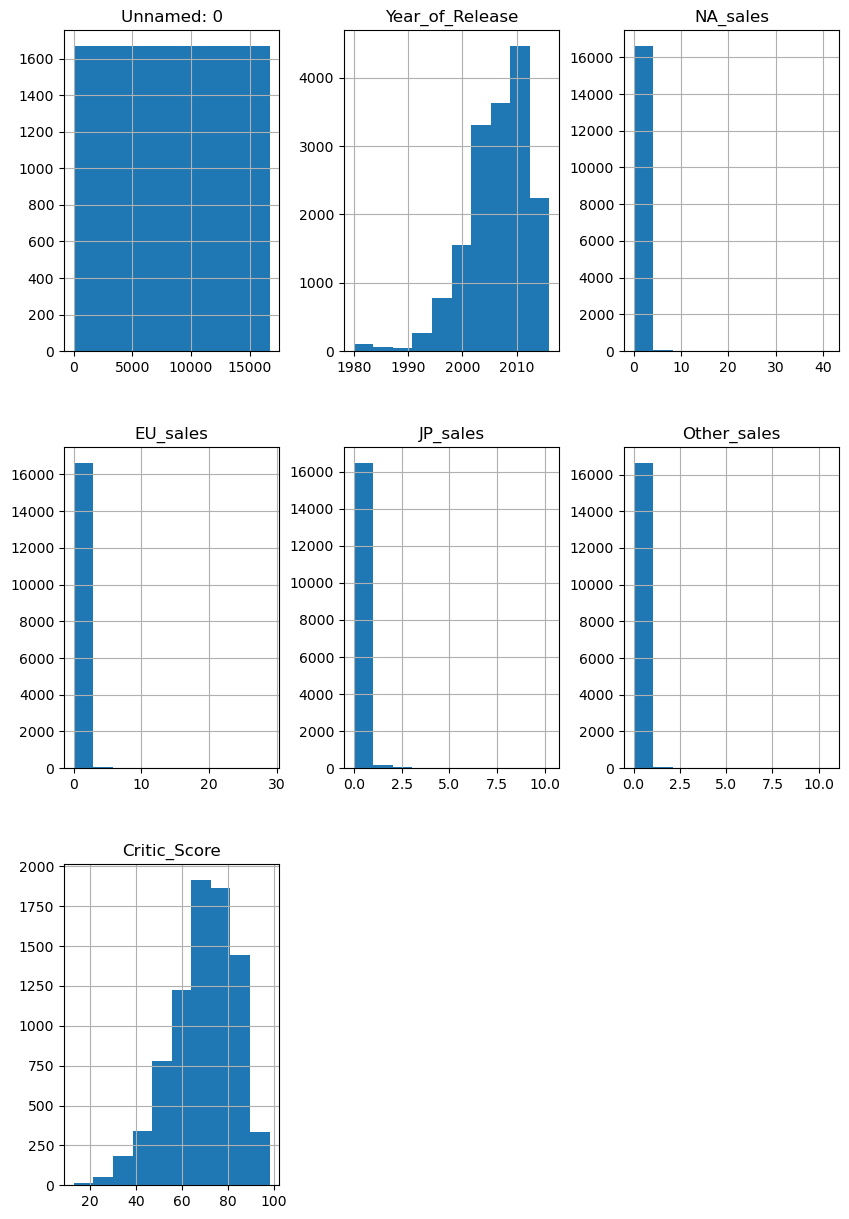

In [5]:
# Create histograms for numerical features

data.hist(figsize=(10, 15));

In [6]:
# Conduct a data analysis for the columns in the dataset.
# Display unique values for categorical columns
# and provide statistical descriptions for numerical columns

columns_to_describe = ['Name', 'Genre', 'Platform', 'NA_sales', 'EU_sales',
                       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']

for column in columns_to_describe:
    print(f"Column: {column}")
    print ('')
    print(data[column].value_counts() if column in ['Name', 'Genre', 'Platform', 'Rating'] 
          else data[column].describe())
    print()


Column: Name

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

Column: Genre

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Column: Platform

PS2     2161
DS      2151
PS

**SUMMARY**

1) After displaying the general information, we can see that the dataset primarily contains data on game sales from the year 2010.

2) The dataset includes games with the following ESRB rating categories: E, T, M, E10+, EC, K-A, RP, AO. The most common rating category in the dataset is E (for everyone: ages 6 and older). It's also important to note that the category K-A (kids to adult) is equivalent to E. Three games have an undefined rating (RP - rating pending). 

The "K-A" ("Kids to Adults") category was replaced with "E" ("Everyone") in 1998. Replacing "K-A" with "E" in the dataframe would not be correct. However, it might be necessary to consider this when conducting further analysis.

3) Among the genres, the following are represented: 'Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'. The most popular genre in the dataset is 'Action'.

4) The games in the dataset were developed for the following platforms: 'Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'. The most games are available for PS2, DS, and PS3.

5) Most games in the dataset have critic scores ranging from 60 to 80 out of 100.

6) The most common user score is 7.8 out of 10. Additionally, there are 2424 rows (approximately 14%) with a user score of 'tbd' (To Be Determined), which likely indicates that there was no user score information available for those rows at the time of data extraction.

7) Regarding sales by region, the columns 'NA_sales', 'EU_sales', 'JP_sales', and 'Other_sales' contain maximum values that appear to be cumulative totals. These values need to be processed before providing specific characteristics.

**To-Do List:**

1) Convert column names to lowercase.

2) Change data types in the 'Year_of_Release' column (convert to datetime) and 'Critic_Score' column (convert to int).

3) Handle missing values in the 'name', 'genre', 'critic_score', 'user_score', and 'rating' columns.

4) Check the data for duplicates (explicit and implicit).

5) Address outliers and anomalous values.

### Data Preparation

**Renaming the columns:**

In [7]:
# Rename column names
data.columns = data.columns.str.lower()

# Check:
data.columns

Index(['unnamed: 0', 'name', 'platform', 'year_of_release', 'genre',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

**Convert data types:**

In [8]:
# Convert columns 'critic_score' and 'year_of_release' to int format:
data = data.astype({'critic_score': 'Int32', 'year_of_release': 'Int32'})

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       16715 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16715 non-null  object 
 3   year_of_release  16446 non-null  Int32  
 4   genre            16713 non-null  object 
 5   na_sales         16715 non-null  float64
 6   eu_sales         16715 non-null  float64
 7   jp_sales         16715 non-null  float64
 8   other_sales      16715 non-null  float64
 9   critic_score     8137 non-null   Int32  
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: Int32(2), float64(4), int64(1), object(5)
memory usage: 1.4+ MB


In the column with user ratings, the most popular value is 'tbd'. Since this is a string value, there may be issues with further calculations, so let's replace 'tbd' with 'None' and then change the data type to float

In [9]:
# Replace 'tbd' in the user_score column with 'None' and change the data type to float:
data.loc[data['user_score'] == 'tbd'] = 0
data = data.astype({'user_score': 'float64'})

# Replace 0 with 'None' in the user_score column:
data.loc[data['user_score'] == 0] = None

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unnamed: 0       14290 non-null  float64
 1   name             14288 non-null  object 
 2   platform         14290 non-null  object 
 3   year_of_release  14069 non-null  Int32  
 4   genre            14288 non-null  object 
 5   na_sales         14290 non-null  float64
 6   eu_sales         14290 non-null  float64
 7   jp_sales         14290 non-null  float64
 8   other_sales      14290 non-null  float64
 9   critic_score     7055 non-null   Int32  
 10  user_score       7589 non-null   float64
 11  rating           7574 non-null   object 
dtypes: Int32(2), float64(6), object(4)
memory usage: 1.4+ MB


**Handling Missing Values**

Missing values have been detected in the following columns: 'name', 'genre', 'critic_score', 'user_score', 'rating'.

In [10]:
# Start with the 'name' column
# Display rows with missing values in the 'name' column:
data.loc[data['name'].isna() == True].head(10)

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
301,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
520,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
645,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
657,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
659,659.0,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,NaN,NaN
718,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
726,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
821,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None
881,NaN,None,None,<NA>,None,NaN,NaN,NaN,NaN,<NA>,NaN,None


We have two rows, where most of the data is missing. It is not possible to restore the data, so let's exclude the rows from the dataframe.

In [11]:
data = data.dropna(subset=['name']).reset_index(drop=True)

# Check
#data.loc[data['name'].isna() == True]

The missing values in the 'name' and 'genre' columns matched.

Moving on to 'critic_score'. There are 8137 missing values in this column. Let's try to find out whether this is a systematic error or a random error. Let's group the data with respect to whether the critics' score is specified or not.

We will use the groupby() method for grouping. True - no age. False - the value is filled.


In [12]:
data.groupby(data['critic_score'].isna()).mean()

,unnamed: 0,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
critic_score,,,,,,,,
False,6700.138058,2007.472355,0.388354,0.232668,0.062771,0.081202,70.233877,7.182428
True,9381.585649,2005.208543,0.187269,0.093624,0.117224,0.024865,<NA>,6.433566


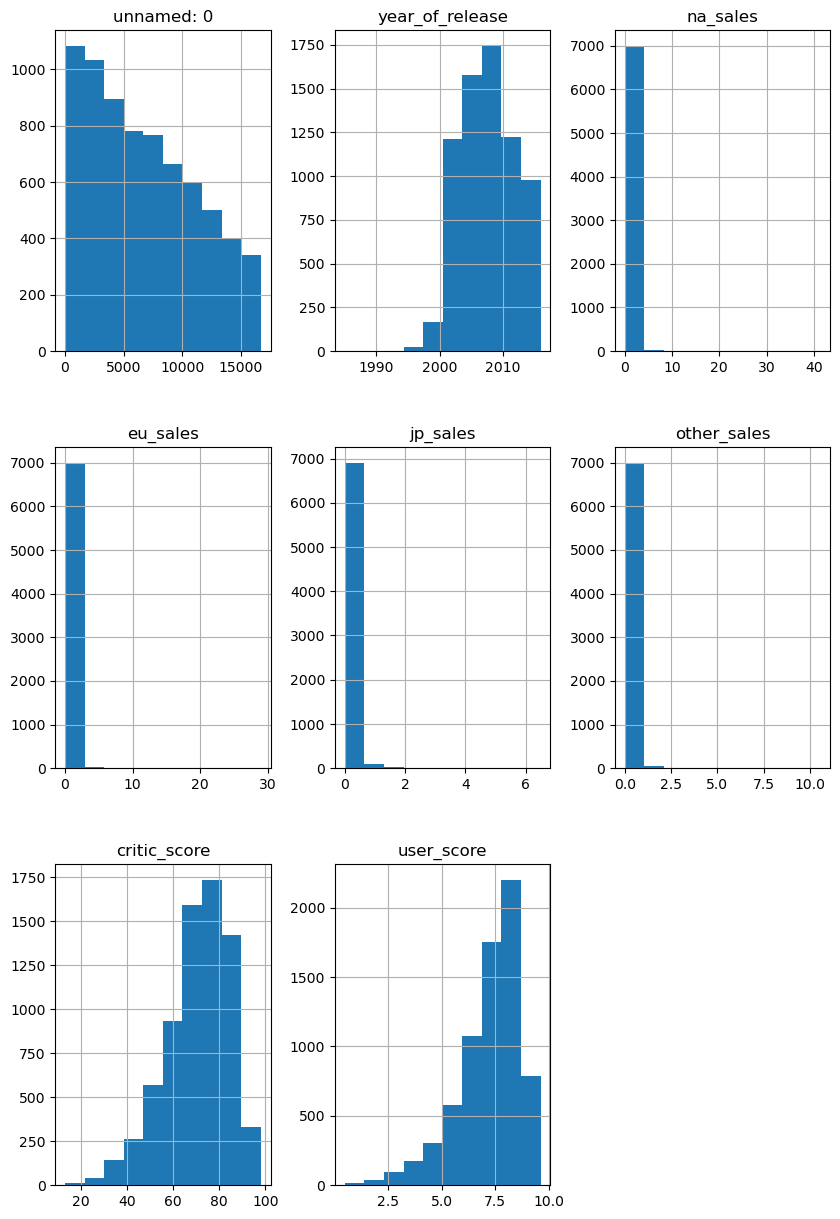

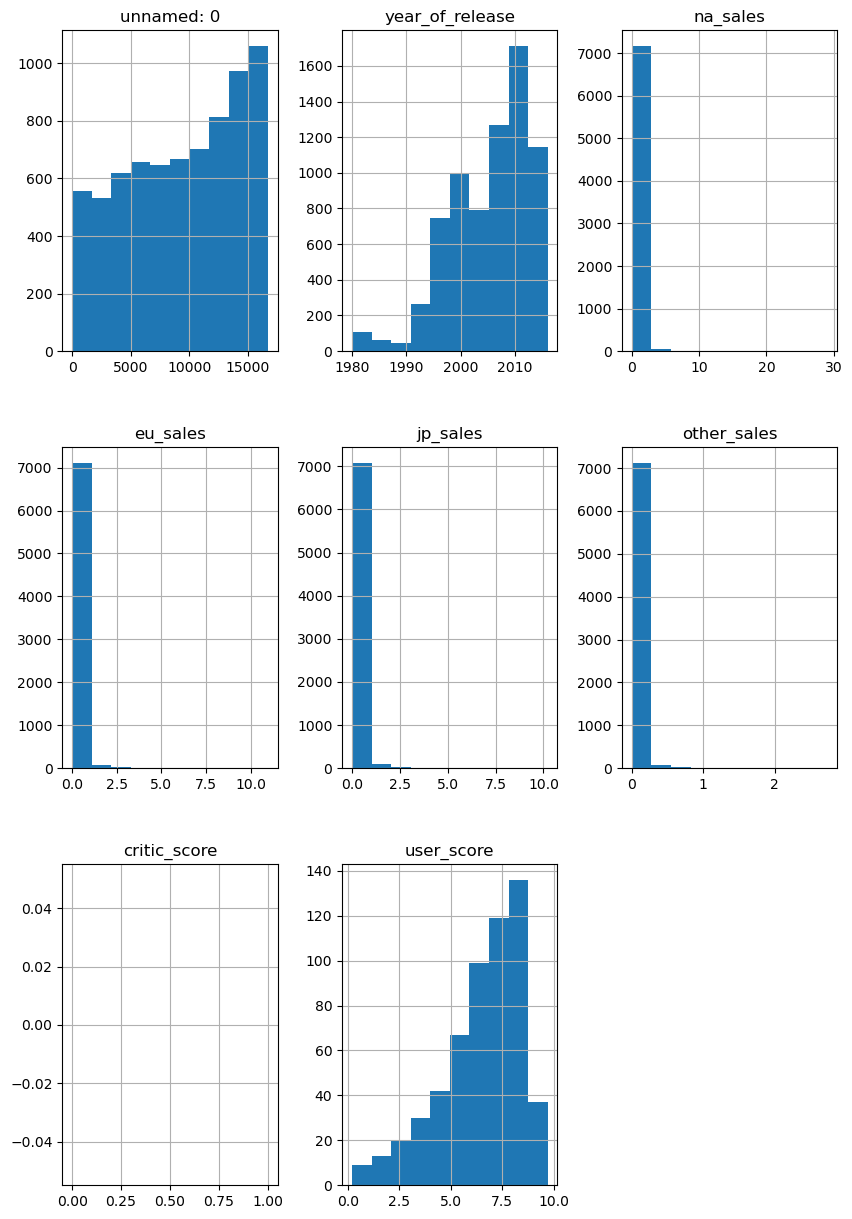

In [13]:
# Visualize using histograms
data.groupby(data['critic_score'].isna()).hist(figsize=(10,15));

In [14]:
# Group data with missing 'critic_score' values by release year
missing_critic_score_by_year = data[data['critic_score'].isna() == True]['year_of_release'].value_counts().sort_values()

# Display the result
print(missing_critic_score_by_year)

1980      9
1985     13
1988     14
1984     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1991     41
1992     42
1981     46
1993     60
1994    120
2001    143
2004    175
2003    179
2002    182
2000    204
1995    219
2016    241
2005    253
1996    255
2013    257
1997    272
1999    297
2014    303
2012    308
2015    345
1998    351
2006    352
2007    415
2011    451
2009    464
2010    491
2008    501
Name: year_of_release, dtype: Int64


In [15]:
# Group data with missing 'critic_score' values by genre
missing_critic_score_by_genre = data.loc[data['critic_score'].isna() == True]['genre'].value_counts()

# Display the result
print(missing_critic_score_by_genre)

Action          1311
Sports           954
Misc             902
Adventure        872
Role-Playing     747
Fighting         426
Racing           409
Strategy         360
Platform         341
Shooter          338
Simulation       329
Puzzle           244
Name: genre, dtype: int64


In [16]:
# Group data with missing 'critic_score' values by game names
missing_critic_score_by_name = data.loc[data['critic_score'].isna() == True]['name'].value_counts()

# Display the result
print(missing_critic_score_by_name)

The Amazing Spider-Man 2 (2014)                                 7
FIFA 12                                                         7
Minecraft                                                       6
Lego Batman 3: Beyond Gotham                                    6
The Amazing Spider-Man (Console Version)                        6
                                                               ..
Valkyria Chronicles                                             1
Jikkyou Powerful Pro Yakyuu 10 Chou Ketteiban: 2003 Memorial    1
The Ultimate Red Ball Challenge                                 1
Shining Blade                                                   1
Haitaka no Psychedelica                                         1
Name: name, Length: 6172, dtype: int64


In [17]:
data['critic_score'].describe()

count       7055.0
mean     70.233877
std      13.885728
min           13.0
25%           62.0
50%           72.0
75%           80.0
max           98.0
Name: critic_score, dtype: Float64

In [18]:
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   48,   57,   29,   47,   65,
   55,   54,   20,   53,   38,   33,   52,   30,   32,   43,   45,   40,   46,
   51,   39,   34,   35,   41,   36,   37,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int32

There is no reason to believe that this is a systematic error. Filling in the mean or median value seems inappropriate, since the evaluation does not depend on genre, game title, year of release, or number of copies sold. The 8137 values represent about 48% of the total, excluding such a large amount of data could skew the results of the study. (A possible solution would be to enrich the data from external sources, but due to time constraints this option was not implemented). Let's leave the data unchanged

Next in line is the 'user_score' column. Let's perform the same steps.

In [19]:
# 'user_score'
data.groupby(data['user_score'].isna()).mean()

,unnamed: 0,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
user_score,,,,,,,,
False,6794.933456,2007.686813,0.375778,0.224923,0.059100,0.079391,70.249822,7.125985
True,9487.943424,2004.782892,0.185487,0.091314,0.125723,0.022426,67.289474,NaN


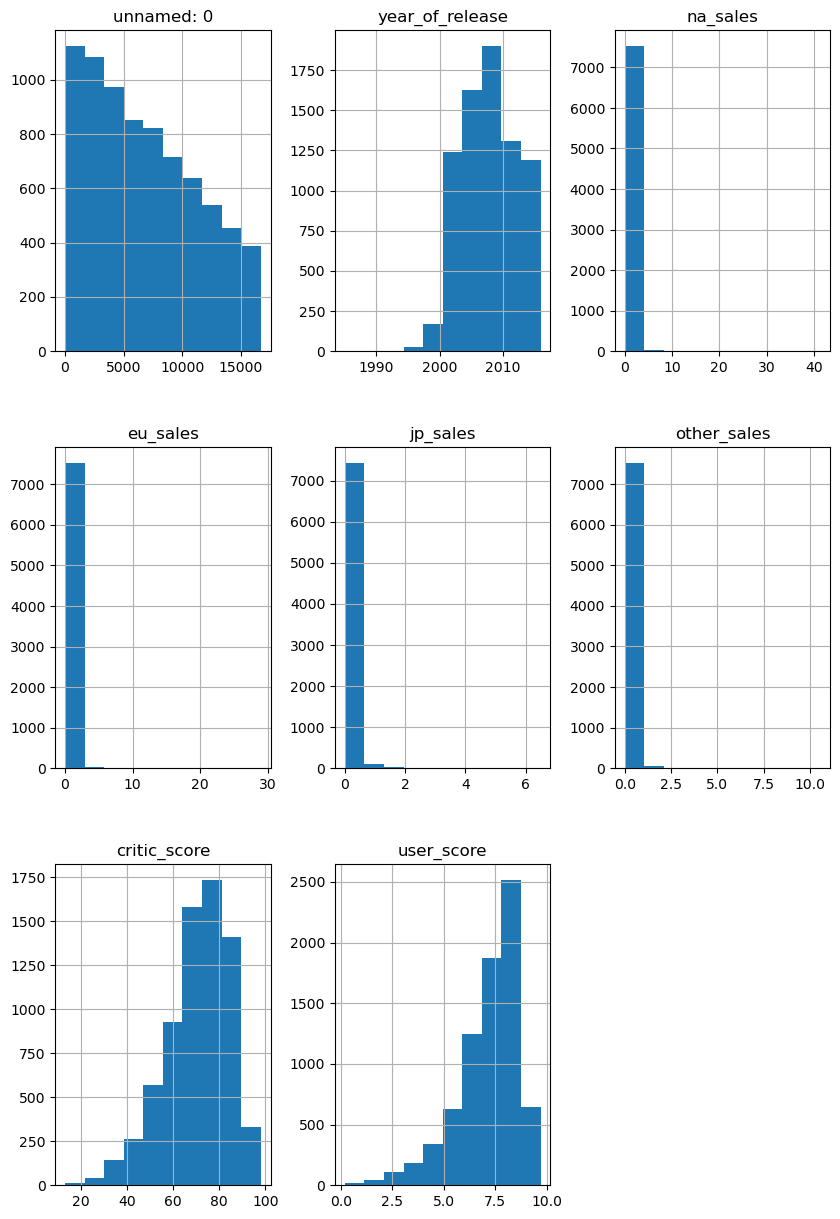

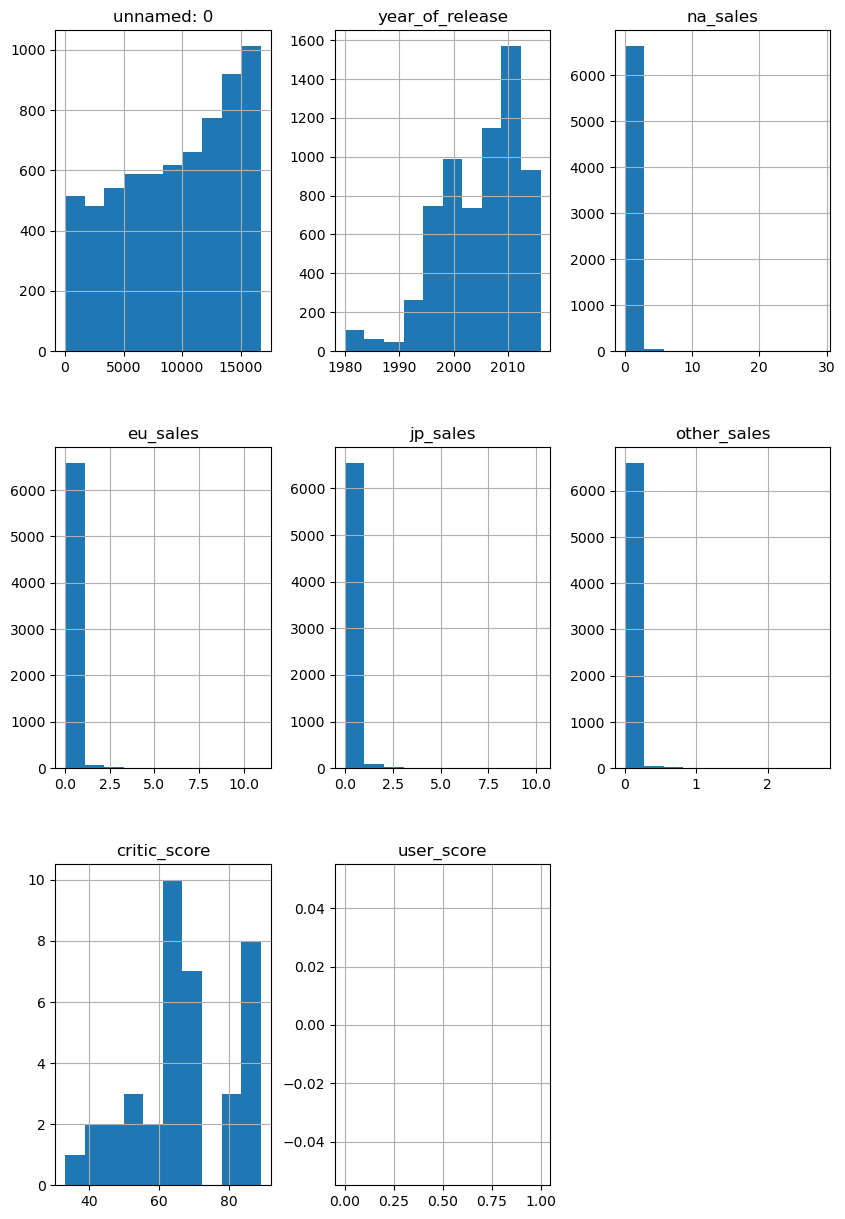

In [20]:
data.groupby(data['user_score'].isna()).hist(figsize=(10,15));

In [21]:
# Group data with missing 'user_score' values by release year
data[data['user_score'].isna()==True]['year_of_release'].value_counts().sort_values()

1980      9
1985     13
1988     14
1984     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1991     41
1992     42
1981     46
1993     60
1994    120
2001    143
2003    164
2004    166
2002    173
2000    200
2016    206
1995    219
2013    225
2014    231
2005    235
1996    255
1997    270
2015    271
2012    290
1999    299
2006    330
1998    348
2007    376
2009    407
2011    418
2008    440
2010    457
Name: year_of_release, dtype: Int64

In [22]:
# Group data with missing 'user_score' values by genre
missing_user_score_by_genre = data.loc[data['user_score'].isna() == True]['genre'].value_counts()

# Display the result
print(missing_user_score_by_genre)

Action          1163
Misc             862
Adventure        844
Sports           832
Role-Playing     725
Fighting         411
Racing           375
Strategy         333
Platform         321
Shooter          300
Simulation       292
Puzzle           241
Name: genre, dtype: int64


In [23]:
# Group data with missing 'user_score' values by game names
missing_user_score_by_name = data.loc[data['user_score'].isna() == True]['name'].value_counts()

# Display the result
print(missing_user_score_by_name)


The Amazing Spider-Man 2 (2014)                                       7
FIFA 12                                                               7
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
The Walking Dead: Season One                                          6
The Amazing Spider-Man (Console Version)                              6
                                                                     ..
Story of Seasons: Good Friends of the Three Villages                  1
All Star Pro-Wrestling                                                1
Rocket Power: Zero Gravity Zone                                       1
Deal or No Deal: The Banker is Back!                                  1
Haitaka no Psychedelica                                               1
Name: name, Length: 5796, dtype: int64


In [24]:
data['user_score'].describe()

count    7589.000000
mean        7.125985
std         1.497873
min         0.200000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [25]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Here, as in the previous column, there is no reason to believe that missing values are systematic error. For similar reasons, filling in the mean or median value seems inappropriate. We leave the data unchanged.

Moving on to the missing values of the 'rating' column.

In [26]:
# 'rating'
data.groupby(data['rating'].isna()).mean()

,unnamed: 0,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
rating,,,,,,,,
False,6790.349353,2007.641446,0.377109,0.22535,0.059255,0.079501,70.248997,7.127829
True,9487.098153,2004.843043,0.184412,0.09113,0.125399,0.022429,68.898734,6.965116


In [27]:
# Group data with missing 'rating' values by release year
missing_rating_by_year = data[data['rating'].isna() == True]['year_of_release'].value_counts().sort_values()

# Display the result
print(missing_rating_by_year)


1980      9
1985     13
1988     14
1984     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1991     41
1992     41
1981     46
1993     60
1994    120
2001    142
2003    162
2004    163
2002    173
2000    200
2016    218
1995    219
2013    228
2005    233
2014    234
1996    256
1997    270
2015    284
2012    295
1999    296
2006    326
1998    347
2007    375
2009    409
2011    424
2008    441
2010    450
Name: year_of_release, dtype: Int64


In [28]:
# Group data with missing 'rating' values by genre
missing_rating_by_genre = data.loc[data['rating'].isna() == True]['genre'].value_counts()

# Display the result
print(missing_rating_by_genre)

Action          1172
Misc             858
Adventure        851
Sports           832
Role-Playing     721
Fighting         411
Racing           376
Strategy         341
Platform         319
Shooter          304
Simulation       294
Puzzle           235
Name: genre, dtype: int64


In [29]:
# Group data with missing 'rating' values by game names
missing_rating_by_name = data.loc[data['rating'].isna() == True]['name'].value_counts()

# Display the result
print(missing_rating_by_name)


The Amazing Spider-Man 2 (2014)                                       7
FIFA 12                                                               7
Sonic & All-Stars Racing Transformed                                  6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
The Walking Dead: Season One                                          6
                                                                     ..
All Star Pro-Wrestling                                                1
Rocket Power: Zero Gravity Zone                                       1
Deal or No Deal: The Banker is Back!                                  1
Samurai Spirits (CD)                                                  1
Haitaka no Psychedelica                                               1
Name: name, Length: 5809, dtype: int64


No connection between rating and other numeric columns was found. However, it is striking that in the rows with missing values in the columns 'critic_score', 'user_score' and 'rating' the names of the same games occur. Let's check how many such coincidences there are.

In [30]:
data.loc[((data['critic_score'].isna()==True) & \
     (data['user_score'].isna()==True) & \
     (data['rating'].isna()==True))]['name'].value_counts()

FIFA 12                                     7
The Amazing Spider-Man 2 (2014)             7
Minecraft                                   6
Disney Infinity 2.0: Marvel Super Heroes    6
Sonic & All-Stars Racing Transformed        6
                                           ..
Drift King Shutokou Battle '94              1
CandyLand / Chutes & Ladders / Memory       1
International Superstar Soccer 2000         1
Buzz! The Schools Quiz                      1
Haitaka no Psychedelica                     1
Name: name, Length: 5731, dtype: int64

We got 5731 values. And some of them occur several times in the set. Possibly they are duplicates.

**Check for duplicates**

In [31]:
data.duplicated().sum()

0

No obvious duplicates were found. Let's display the row with the most popular game name from the last slice:

In [32]:
data.loc[data['name']=='The Amazing Spider-Man 2 (2014)']

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3490,3650.0,The Amazing Spider-Man 2 (2014),PS4,2014,Action,0.20,0.25,0.02,0.09,<NA>,NaN,NaN
6005,6496.0,The Amazing Spider-Man 2 (2014),PS3,2014,Action,0.06,0.14,0.02,0.04,<NA>,NaN,NaN
6429,6992.0,The Amazing Spider-Man 2 (2014),X360,2014,Action,0.10,0.11,0.00,0.02,<NA>,NaN,NaN
6645,7253.0,The Amazing Spider-Man 2 (2014),XOne,2014,Action,0.12,0.08,0.00,0.02,<NA>,NaN,NaN
10755,12384.0,The Amazing Spider-Man 2 (2014),3DS,2014,Action,0.03,0.03,0.00,0.01,<NA>,NaN,NaN
11018,12720.0,The Amazing Spider-Man 2 (2014),WiiU,2014,Action,0.03,0.02,0.00,0.00,<NA>,NaN,NaN
14217,16631.0,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.00,0.00,<NA>,NaN,NaN


It's clear now. It is a matter of different platforms. 

It is not possible to find an adequate replacement for the missing values, so we replace the omissions in the rating column with "Unknown" to get additional information when analyzing this column.

In [33]:
# Fill missing values in the 'rating' column with 'Unknown'
data['rating'] = data['rating'].fillna('Unknown')

# Check if there are any remaining missing values in the 'rating' column
#missing_rating_count = data['rating'].isna().sum()
#print(missing_rating_count)

Earlier we displayed unique values of columns with game names, game platforms, genres, critics' scores, users' scores and ESRB rating - no implicit duplicates were found in them. 

**Finding outliers and anomalous values**

Given the specifics of the games market, where hit games are often the main source of profit for many game companies, we will not exclude emissions from the dataset in this project.
However, we will check the maximum values in the columns with sales by region, which alerted us earlier:

In [34]:
# 'na_sales'
data['na_sales'].max()

41.36

In [35]:
data.query('na_sales == 41.36')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0.0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E


In [36]:
sum(data.loc[(data['na_sales'] < data['na_sales'].max())]['na_sales'])

4053.0000000002174

In [37]:
# 'eu_sales'
data['eu_sales'].max()

28.96

In [38]:
data.query('eu_sales == 28.96')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0.0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E


In [39]:
sum(data.loc[(data['eu_sales'] < data['eu_sales'].max())]['eu_sales'])

2289.69000000042

In [40]:
# 'jp_sales'
data['jp_sales'].max()

10.22

In [41]:
data.query('jp_sales == 10.22')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,4.0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,NaN,Unknown


In [42]:
#'other_sales'

data['other_sales'].max()

10.57

In [43]:
data.query('other_sales == 10.57')

,unnamed: 0,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,17.0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.4,0.41,10.57,95,9.0,M


In [44]:
sum(data.loc[(data['jp_sales'] < data['jp_sales'].max())]['jp_sales'])

1280.5099999999013

After we displayed the rows with the maximum values in the columns with information about game sales by region, it became clear that our assumption that the maximum values in these columns could be the sum of values was incorrect. Let's leave the data unchanged.

**Calculate total sales in all regions and record them in a separate column**

In [45]:
# Calculate the 'total_sales' column by summing regional sales columns
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Check the first few rows of the DataFrame
#data.head()


**SUMMARY**

1) In this step, we have changed the data types: 'year_of_release' and 'critic_score' To 'Int32', 'user_score' to 'Float64'

2) We processed missing values in the columns: 'name', 'genre', 'critic_score', 'user_score', 'rating'.

- The rows with missing values in the 'name' and 'genre' columns were excluded from the set.

- We found no reason to consider missing values in columns 'critic_score', 'user_score', 'rating' as systematic errors.

- We found it inappropriate to fill in the mean or median value, since the values in these columns do not depend on genre, game title, year of release, or number of copies sold.  Excluding such a large amount of data could have distorted the results of the study, so the data in all columns except 'rating' were left unchanged. 

- Omissions in the 'rating' column were replaced with 'Unknown'.

3) A check for explicit and implicit duplicates was carried out and no duplicates were identified. However, it should be taken into account that categories E and K-A describe the same age groups.

4) We also checked the assumption that the maximum values in these columns could be the sum of the values; it turned out to be incorrect.

5) Total sales in all regions were calculated and the results were recorded in the 'total_sales' column.

### Exploratory data analysis

In [46]:
# Create DataFrame with 'name' and 'year_of_release' columns
names = data['name'].to_frame()
years = data['year_of_release'].to_frame()

# Join 'names' and 'years' DataFrames and sort by 'year_of_release'
names_per_years = years.join(names).sort_values(by='year_of_release')

# Filter out rows where 'year_of_release' is not 'NA'
names_per_years = names_per_years.loc[names_per_years['year_of_release'] != 'NA']

# Count the number of games released each year
game_counts_per_year = names_per_years['year_of_release'].value_counts()

# Display the result
print(game_counts_per_year)

2008    1100
2009    1021
2007    1005
2010     924
2011     919
2006     882
2005     818
2003     680
2004     655
2002     637
2012     629
2015     568
2014     560
2013     529
2016     468
2001     400
1998     379
1999     330
2000     307
1997     288
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64


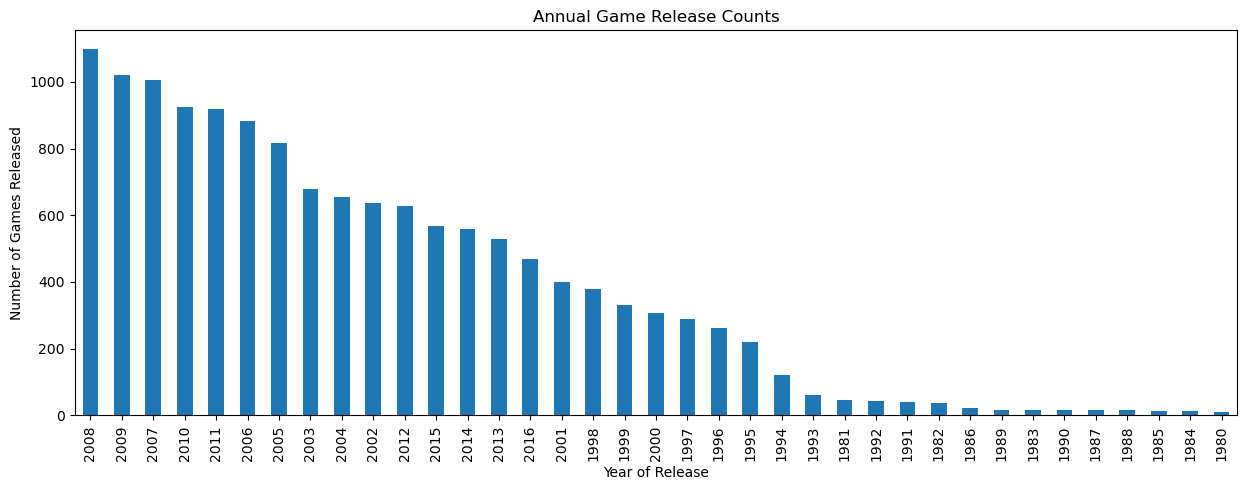

In [47]:
# Count the number of games released each year and create a bar plot
names_per_years['year_of_release'].value_counts().plot(kind='bar', figsize=(15, 5))

# Set plot labels and title
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Annual Game Release Counts')

# Show the plot
plt.show()

According to available data, the most games were released in 2008. The least in 1980.

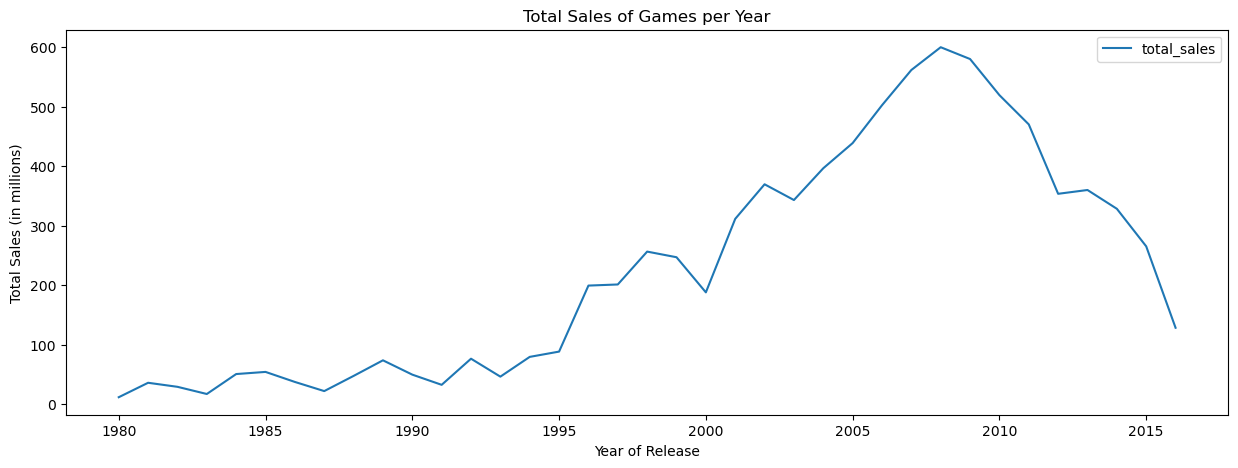

In [48]:
# Create a pivot table to calculate total sales per year
sales_per_year = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

# Sort the values by 'year_of_release' and create a plot
sales_per_year.sort_values(by='year_of_release').plot(y='total_sales', figsize=(15, 5))

# Set plot labels and title
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales of Games per Year')

# Show the plot
plt.show()

In [49]:
# Create a pivot table to calculate total sales per year and sort by total sales in descending order
total_sales_by_year = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
                          .sort_values(by='total_sales', ascending=False)

# Display the result
print(total_sales_by_year)


                 total_sales
year_of_release             
2008                  600.06
2009                  580.20
2007                  561.77
2010                  519.46
2006                  502.47
2011                  470.24
2005                  438.83
2004                  396.50
2002                  369.52
2013                  359.92
2012                  353.52
2003                  343.04
2014                  328.32
2001                  311.37
2015                  265.14
1998                  256.31
1999                  246.83
1997                  201.02
1996                  199.15
2000                  187.74
2016                  128.21
1995                   88.12
1994                   79.23
1992                   76.16
1989                   73.45
1985                   53.95
1984                   50.35
1990                   49.37
1988                   47.21
1993                   45.99
1986                   37.08
1981                   35.68
1991          

The graph clearly shows that there is an increase in the number of copies sold from 2000 to 2008 and then a decline until 2016.

It is necessary to check how sales have changed by platform.

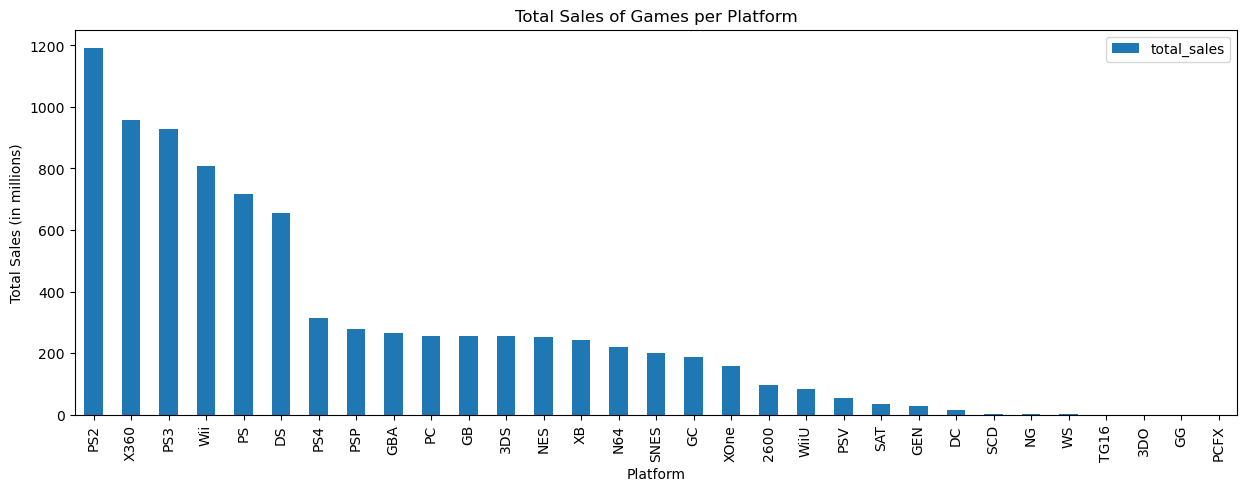

In [50]:
import matplotlib.pyplot as plt

# Create a pivot table to calculate total sales per platform and sort by total sales in descending order
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                        .sort_values(by='total_sales', ascending=False)

# Create a bar plot
sales_by_platform.plot(kind='bar', y='total_sales', figsize=(15, 5))

# Set plot labels and title
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales of Games per Platform')

# Show the plot
plt.show()


Top 10 platforms with the highest total sales: PS2, X360, PS3, Wii, PS, DS, PS4, PSP, GBA, PC.

Let's plot the distribution by year. We are interested in the platforms, according to which data we can build a forecast for 2017. Let's take the data on the platforms for which games were released up to 2016.

In [51]:
# Select unique platforms for the year 2016
data_actual_platform = data.loc[data['year_of_release'] == 2016]['platform'].unique()

# Check the result
#data_actual_platform

Let's declare the variable "actual_platform_data" and assign to it the result of the slice by actual platforms and the last two years of the dataset:

In [52]:
# Select data for actual platforms in 2016 and 2015
actual_platform_data = data.loc[
    (data['platform'].isin(data_actual_platform)) &
    (data['year_of_release'].isin([2016, 2015]))
]

# Check the first few rows of the resulting DataFrame
#actual_platform_data.head()

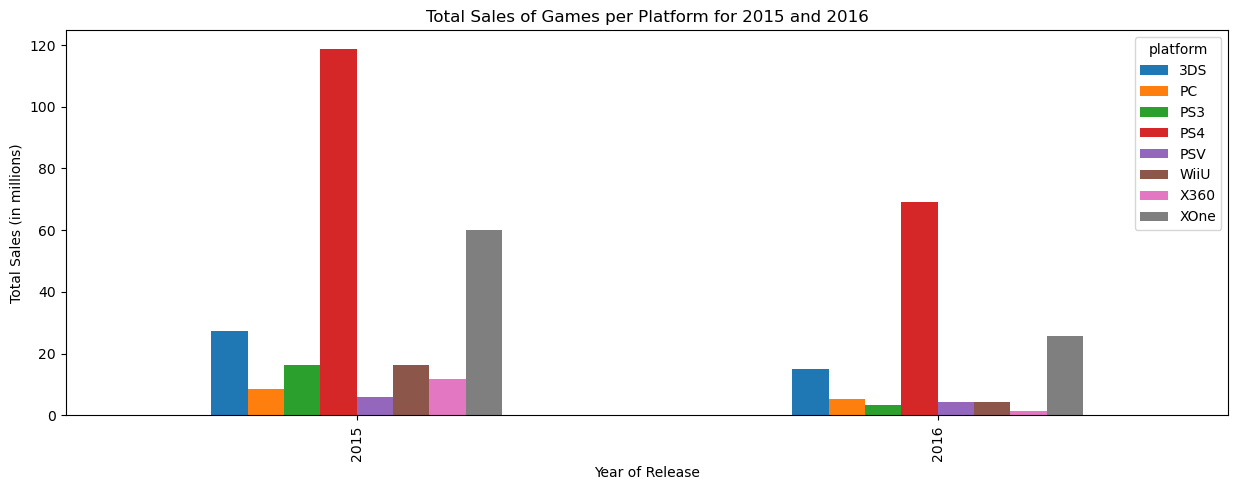

In [53]:
# Create a pivot table to calculate total sales per platform for the years 2015 and 2016
sales_by_platform_year = actual_platform_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Create a bar plot
sales_by_platform_year.plot(kind='bar', figsize=(15, 5))

# Set plot labels and title
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales of Games per Platform for 2015 and 2016')

# Show the plot
plt.show()

The leading platform in terms of copies sold in 2015 and 2016 was PS4. In second place, but with a noticeable lag, is XOne. In third place is the 3DS.

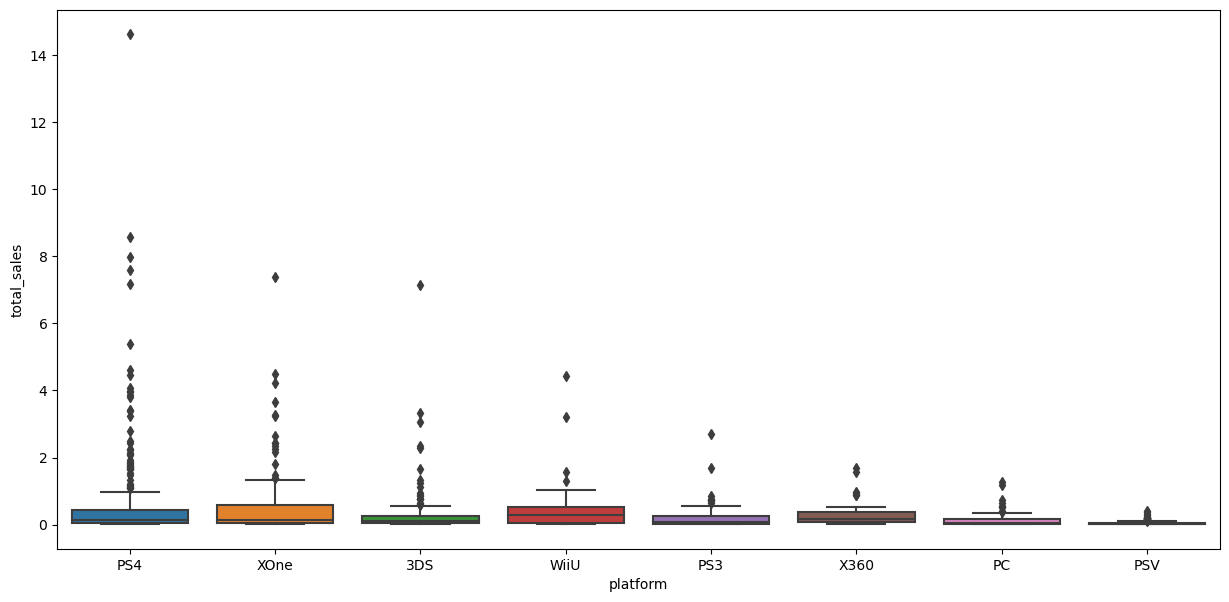

In [54]:
# Set the figure size
plt.figure(figsize=(15, 7))

# Create a boxplot
sns.boxplot(x='platform', y='total_sales', data=actual_platform_data)

# Show the plot
plt.show()

The graph shows that there are quite a large number of outliers in the data. This is especially true for the leading platforms. Let's set the sales target at 1.5 million and disable the display of outlier values:

(0.0, 1.5)

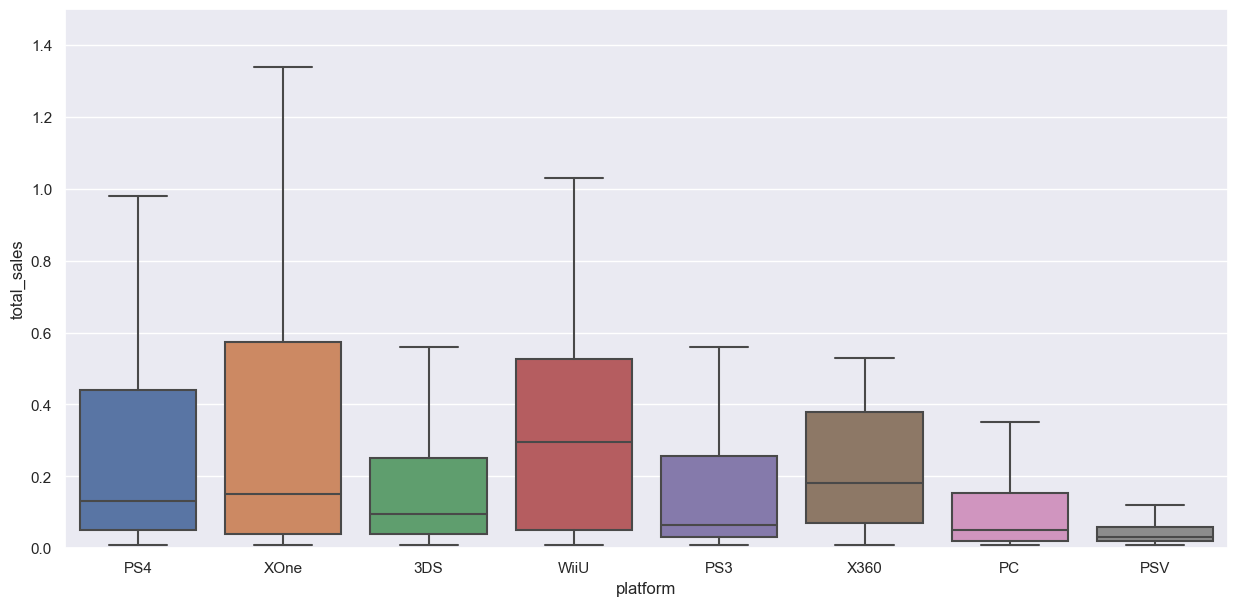

In [55]:
sns.set(rc = {'figure.figsize':(15, 7)})

sns.boxplot(x = 'platform', y = 'total_sales', data = actual_platform_data, showfliers=False);

plt.ylim(0, 1.5) 

In [56]:
# PS4

actual_platform_data[actual_platform_data['platform']=='PS4']['total_sales'].describe()

count    295.000000
mean       0.637322
std        1.469292
min        0.010000
25%        0.050000
50%        0.130000
75%        0.440000
max       14.630000
Name: total_sales, dtype: float64

Most of the values of the number of copies sold on the PS4 platform are between 50 thousand and 440 thousand (1 - 3 quartiles). The average is 638 thousand, the median is 130 thousand. The sample is skewed to the right (more values that significantly exceed the average). The number of sales for 2015-16 is 295.

In [57]:
# XOne

actual_platform_data[actual_platform_data['platform']=='XOne']['total_sales'].describe()

count    156.000000
mean       0.549615
std        0.991235
min        0.010000
25%        0.040000
50%        0.150000
75%        0.575000
max        7.390000
Name: total_sales, dtype: float64

The sample for XOne platform is also slanted to the right (more values that significantly exceed the average). Most of the values of the number of copies sold are in the range of 40 thousand - 575 thousand. The average is 550 thousand, the median is 150 thousand. The number of sales for 2015-16 is 156.

In [58]:
# 3DS

actual_platform_data[actual_platform_data['platform']=='3DS']['total_sales'].describe()

count    120.000000
mean       0.352583
std        0.832736
min        0.010000
25%        0.040000
50%        0.095000
75%        0.250000
max        7.140000
Name: total_sales, dtype: float64

3DS platform values mostly lie between 40 thousand and 250 thousand copies sold. The average is 353 thousand, the median is 95 thousand. The number of sales for 2015-16 is 120.

In [59]:
# WiiU

actual_platform_data[actual_platform_data['platform']=='WiiU']['total_sales'].describe()

count    38.000000
mean      0.541316
std       0.883816
min       0.010000
25%       0.050000
50%       0.295000
75%       0.527500
max       4.440000
Name: total_sales, dtype: float64

WiiU platform values mostly lie between 50k and 527k copies sold. The average is 541k and the median is 295k. The number of sales for 2015-16 is 38.

In [60]:
# PS3

actual_platform_data[actual_platform_data['platform']=='PS3']['total_sales'].describe()

count    94.000000
mean      0.207021
std       0.367528
min       0.010000
25%       0.030000
50%       0.065000
75%       0.257500
max       2.700000
Name: total_sales, dtype: float64

PS3 platform values mostly lie between 30k and 257k copies sold. The average is 207k, the median is 650k. The number of sales for 2015-16 is 94.

In [61]:
# X360

actual_platform_data[actual_platform_data['platform']=='X360']['total_sales'].describe()

count    41.000000
mean      0.319268
std       0.400234
min       0.010000
25%       0.070000
50%       0.180000
75%       0.380000
max       1.700000
Name: total_sales, dtype: float64

The values of the X360 platform mostly lie between 70 thousand and 380 thousand copies sold. The average is 207 thousand, the median is 650 thousand. The number of sales for 2015-16 is 41.

In [62]:
# PC

actual_platform_data[actual_platform_data['platform']=='PC']['total_sales'].describe()

count    100.000000
mean       0.137100
std        0.212276
min        0.010000
25%        0.020000
50%        0.050000
75%        0.152500
max        1.280000
Name: total_sales, dtype: float64

PC platform values mostly lie between 20 thousand and 153 thousand copies sold. Average - 137 thousand, median - 50 thousand. The number of sales for 2015-16 is 100.

In [63]:
# PSV

actual_platform_data[actual_platform_data['platform']=='PSV']['total_sales'].describe()

count    188.000000
mean       0.054202
std        0.064525
min        0.010000
25%        0.020000
50%        0.030000
75%        0.060000
max        0.410000
Name: total_sales, dtype: float64

The number of PC game copies sold mostly lie between 10k and 60k. The average is 54k, the median is 30k. The number of sales for 2015-16 is 188.

In all platforms the value of the mean exceeds the value of the median, which indicates that there is a large number of outliers in the set - in this case we are talking about sales of hit games that do not fit into the general trends.
Speaking about the leading platforms, we note that the median for XBox is larger than the median for PS4. However, the number of sales for PS4 exceeds the number of sales for XBox.
Also note that the WiiU has the highest median of all the platforms shown here. However, the number of sales is only 38.

Let's see how sales within one popular platform are affected by user and critic reviews. Let's look at the platforms with the highest global sales - PS4, XOne and 3DS. Draw a scatter plot and calculate the correlation between reviews and sales.

In [64]:
# Critic scores of games for the 'PS4' platform
critic_score = actual_platform_data.loc[actual_platform_data['platform'] == 'PS4']['critic_score']

# User scores of games for the 'PS4' platform
user_score = actual_platform_data.loc[actual_platform_data['platform'] == 'PS4']['user_score']

# Global sales of games for the 'PS4' platform
total_sales = actual_platform_data.loc[actual_platform_data['platform'] == 'PS4']['total_sales']

In [65]:
# Calculate the correlation between critic scores and game sales for the 'PS4' platform
cr_sc_to_sales = critic_score.astype('float64').corr(total_sales.astype('float64'))

# Print the correlation value
print(cr_sc_to_sales)

0.3927377369694067


Correlation coefficient: 0.4. Weak influence. The relationship is direct.

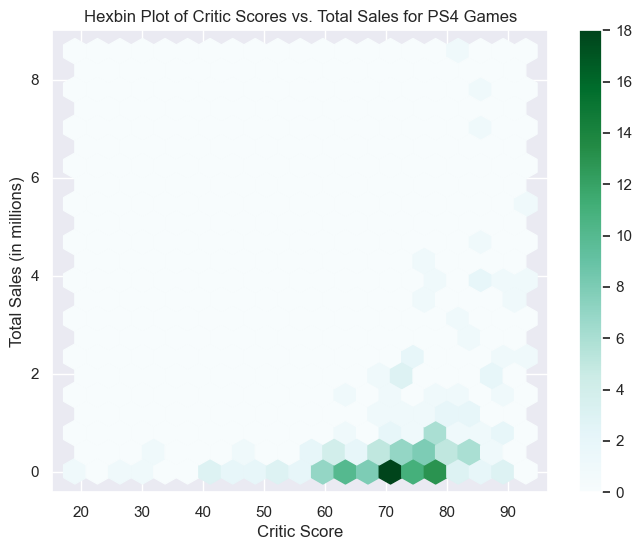

In [66]:
# Filter the data for the 'PS4' platform
ps4_data = actual_platform_data.loc[actual_platform_data['platform'] == 'PS4']

# Create a hexbin plot
ps4_data.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of Critic Scores vs. Total Sales for PS4 Games')

# Show the plot
plt.show()

The graph shows a noticeable densification around the critics' score of 70 for global sales of less than a million copies. However, there is no strong correlation between critic scores and global game sales for the PS4 platform.

In [67]:
# Calculate the correlation between user scores and game sales for the 'PS4' platform
us_sc_to_sales = user_score.astype('float64').corr(total_sales.astype('float64'))

# Print the correlation value
print(us_sc_to_sales)

-0.05973845712638215


We obtained the correlation coefficient: -0.06. Very weak influence (practically zero). The correlation is inverse.

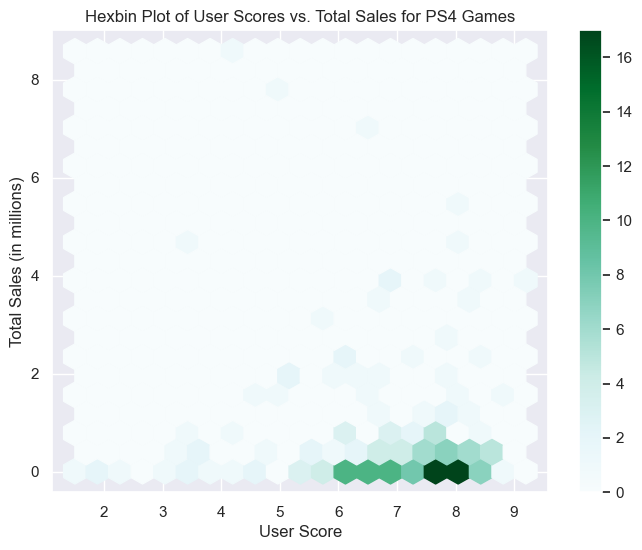

In [68]:
# Filter the data for the 'PS4' platform
ps4_data = actual_platform_data.loc[actual_platform_data['platform'] == 'PS4']

# Create a hexbin plot
ps4_data.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of User Scores vs. Total Sales for PS4 Games')

# Show the plot
plt.show()

We observe a few condensations around the scores: 7.5 and 8. Let's move on to XOne:

In [69]:
# Critic scores of games for the 'XOne' platform
critic_score_xone = actual_platform_data.loc[actual_platform_data['platform'] == 'XOne']['critic_score']

# User scores of games for the 'XOne' platform
user_score_xone = actual_platform_data.loc[actual_platform_data['platform'] == 'XOne']['user_score']

# Global sales of games for the 'XOne' platform
total_sales_xone = actual_platform_data.loc[actual_platform_data['platform'] == 'XOne']['total_sales']

In [70]:
# Calculate the correlation between critic scores and game sales for the 'XOne' platform
cr_sc_to_sales_xone = critic_score_xone.astype('float64').corr(total_sales_xone.astype('float64'))

# Print the correlation value
print(cr_sc_to_sales_xone)

0.4250680620879304


Correlation coefficient: 0.4. Weak influence. The relationship is direct.

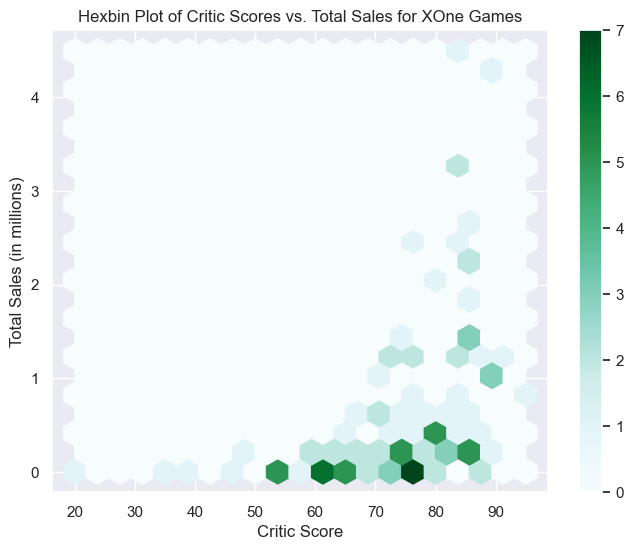

In [71]:
# Filter the data for the 'XOne' platform
xone_data = actual_platform_data.loc[actual_platform_data['platform'] == 'XOne']

# Create a hexbin plot
xone_data.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of Critic Scores vs. Total Sales for XOne Games')

# Show the plot
plt.show()

The graph also shows that there is no strong correlation between critics' scores and global game sales for the XOne platform. There is a densification around a critics' score of 78 for global sales of less than a million copies.

In [72]:
# Calculate the correlation between user scores and game sales for the 'XOne' platform
us_sc_to_sales_xone = user_score_xone.astype('float64').corr(total_sales_xone.astype('float64'))

# Print the correlation value
print(us_sc_to_sales_xone)

-0.04146733387366271


We obtained the correlation coefficient: -0.04. Very weak influence (practically zero). The correlation is inverse.

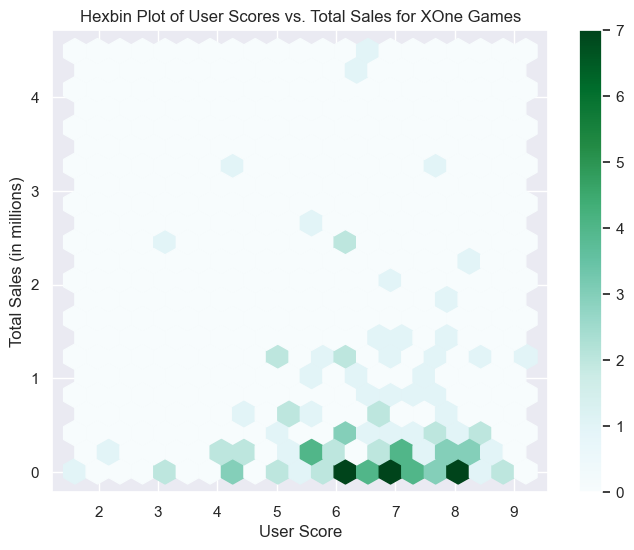

In [73]:
# Filter the data for the 'XOne' platform
xone_data = actual_platform_data.loc[actual_platform_data['platform'] == 'XOne']

# Create a hexbin plot
xone_data.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of User Scores vs. Total Sales for XOne Games')

# Show the plot
plt.show()

Clusters around 6,7,8. Estimates are scattered. There are no influences.

And finally, 3DS:

In [74]:
# Critic scores of games for the '3DS' platform
critic_score_3ds = actual_platform_data.loc[actual_platform_data['platform'] == '3DS']['critic_score']

# User scores of games for the '3DS' platform
user_score_3ds = actual_platform_data.loc[actual_platform_data['platform'] == '3DS']['user_score']

# Global sales of games for the '3DS' platform
total_sales_3ds = actual_platform_data.loc[actual_platform_data['platform'] == '3DS']['total_sales']

In [75]:
# Calculate the correlation between critic scores and game sales for the '3DS' platform
cr_sc_to_sales_3ds = critic_score_3ds.astype('float64').corr(total_sales_3ds.astype('float64'))

# Print the correlation value
print(cr_sc_to_sales_3ds)

0.17757455046092874


Correlation coefficient: 0.2. Weak influence. The relationship is direct.

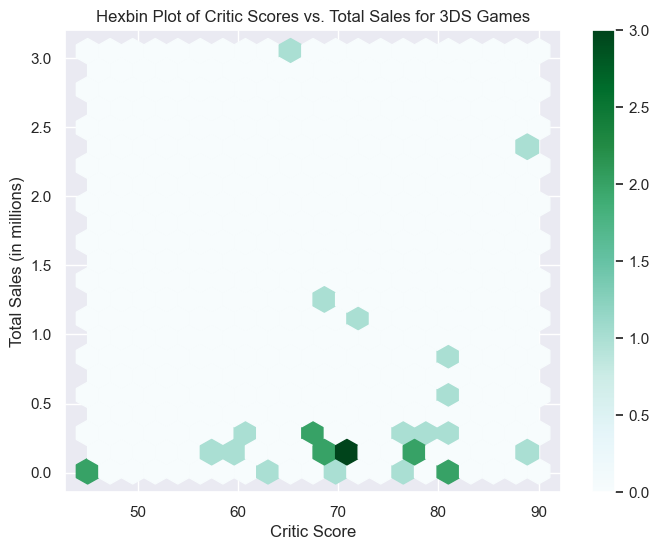

In [76]:
# Filter the data for the '3DS' platform
ds_data = actual_platform_data.loc[actual_platform_data['platform'] == '3DS']

# Create a hexbin plot
ds_data.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of Critic Scores vs. Total Sales for 3DS Games')

# Show the plot
plt.show()

The conclusions are similar. Although the correlation coefficient is higher.

In [77]:
# Calculate the correlation between user scores and game sales for the '3DS' platform
us_sc_to_sales_3ds = user_score_3ds.astype('float64').corr(total_sales_3ds.astype('float64'))

# Print the correlation value
print(us_sc_to_sales_3ds)

0.19879627008102982


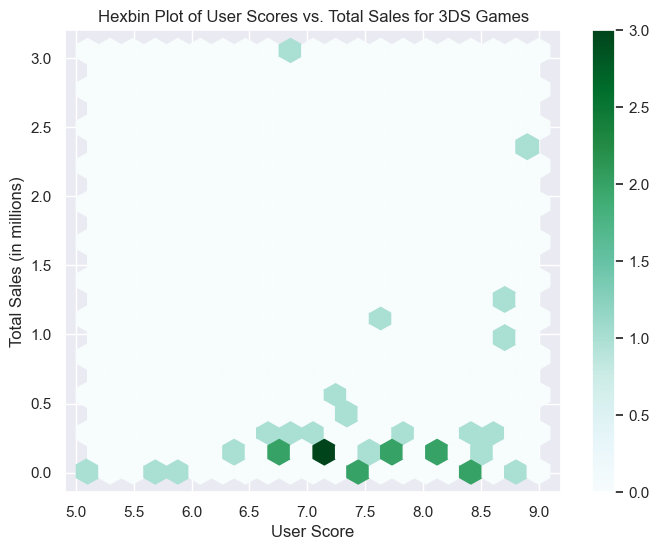

In [78]:
# Filter the data for the '3DS' platform
ds_data = actual_platform_data.loc[actual_platform_data['platform'] == '3DS']

# Create a hexbin plot
ds_data.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

# Set plot labels and title
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Hexbin Plot of User Scores vs. Total Sales for 3DS Games')

# Show the plot
plt.show()

Conclusions are similar.

So there was no significant correlation between critics' scores and global sales, as well as between users' scores and global sales.

Now let's look at the overall distribution of games by genre. 

In [79]:
actual_platform_data['genre'].value_counts()

Action          396
Role-Playing    132
Adventure       106
Sports           98
Shooter          77
Misc             59
Racing           41
Fighting         35
Simulation       30
Strategy         29
Platform         24
Puzzle            5
Name: genre, dtype: int64

The 'Action' genre is in the lead by a large margin. Now let's check which genres are the most profitable in terms of the number of games sold:

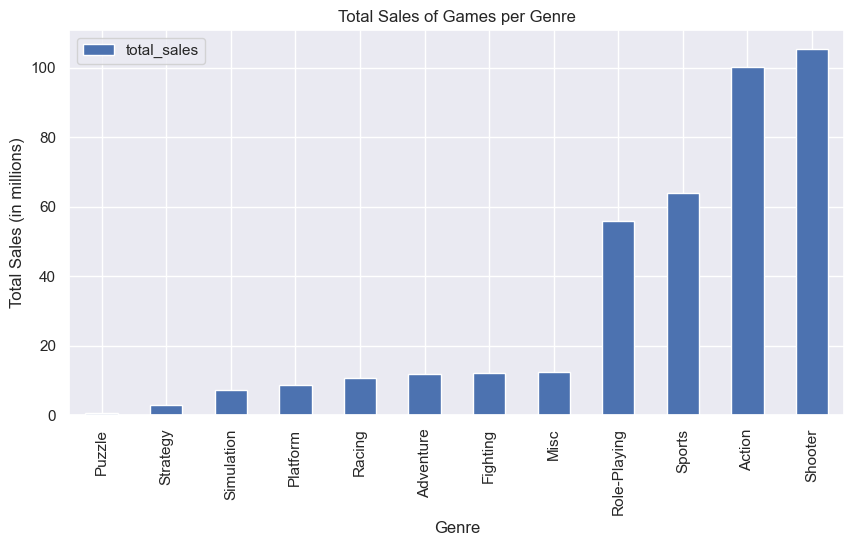

In [80]:
# Create a pivot table to calculate total sales per genre and sort by total sales
sales_by_genre = actual_platform_data.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
                                    .sort_values(by='total_sales')

# Create a bar plot
sales_by_genre.plot(kind='bar', figsize=(10, 5))

# Set plot labels and title
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales of Games per Genre')

# Show the plot
plt.show()

The Fighting, Sports and Shooter genres are the leaders in terms of the number of games sold.
The lowest sales are in Adventure, Puzzle and Strategy.

**SUMMARY**.

1) At this stage, it was found that the most games are reported to have been released in 2008. The least was in 1980.

2) There is an increase in the number of copies sold from 2000 to 2008 and then a decline until 2016.

3) The top 10 platforms with the highest total sales are PS2, X360, PS3, Wii, PS, PS, DS, PS4, PSP, GBA, PC4

4) There is no significant correlation between critics' scores and global sales, nor between users' scores and global sales.

5) The Fighting, Sports and Shooter genres are leading in terms of number of games sold. Adventure, Puzzle and Strategy have the lowest sales.

### User profile of each region

Let's define for the user of each region (NA, EU, JP):
- Most popular platforms (top 5).
- Most popular genres (top 5).

Let's build bar charts based on the sales data in the regions.

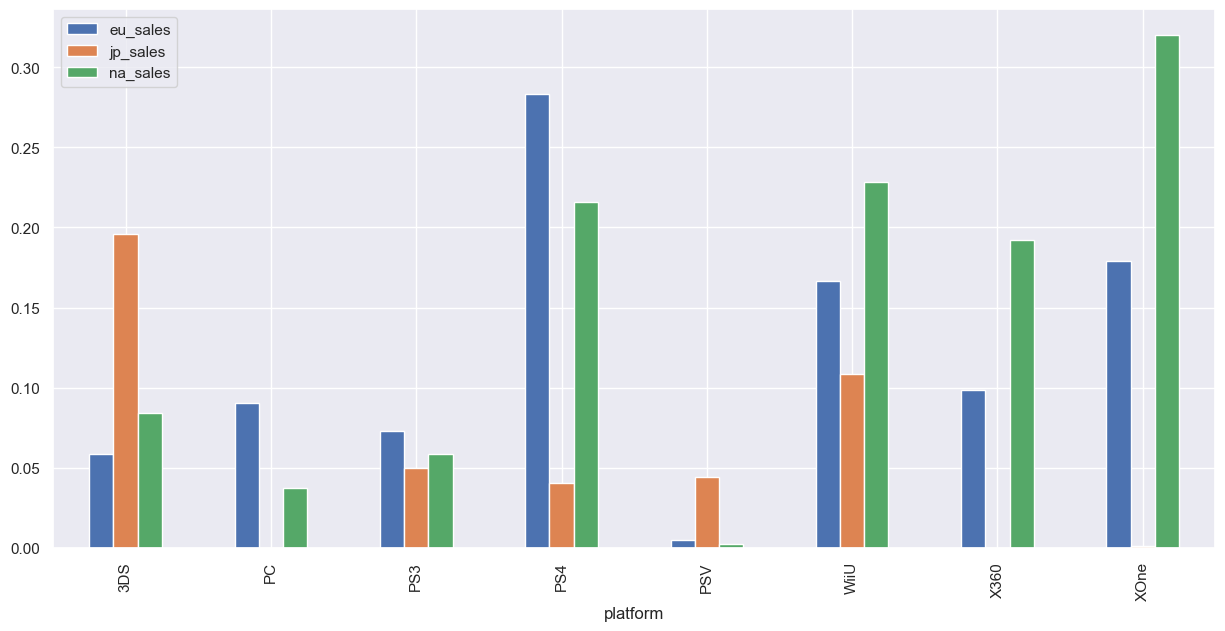

In [81]:
# based on 2011-2016 data
actual_platform_data.pivot_table(index='platform', \
                                 values=['na_sales', 'eu_sales', 'jp_sales']).plot(kind='bar');

The maximum number of copies sold across all platforms except 3DS, PS4 and PSV is in North America. The minimum is in Japan (except 3DS and PSV). In addition, there were no sales on PC, X360 and XOne in Japan during the period under review. In Europe, the most popular platform is PS4.

Let's summarize **the top 5 platforms** and their shares of sales for 2011-2016.

In [82]:
# Define a function to calculate sales shares by region and return the top 5 results
def get_top_sales_by_region(data, region_column, region_name, sales_column, top_n=5):
    # Calculate top platforms by sales in the specified region
    sales_platforms = data.pivot_table(index=region_column, values=sales_column).sort_values(sales_column, ascending=False).head(top_n)
    
    # Calculate the sum of games sold by region
    region_sales_total = data.pivot_table(index=region_column, values=sales_column).sort_values(sales_column, ascending=False).sum()
    
    # Calculate the sales shares for the top platforms
    region_sales_total_rate = (sales_platforms / region_sales_total) * 100
    
    # Merge the top sales data with the sales shares
    sales_platforms = sales_platforms.merge(region_sales_total_rate, left_index=True, right_index=True)
    
    # Rename the columns for clarity
    sales_platforms.columns = ['Number of Games Sold (Millions of Copies)', f'{region_name}_Sales_Share']
    
    return sales_platforms


# Get the top 5 platforms for North America
sales_platforms_na = get_top_sales_by_region(actual_platform_data, 'platform', 'NA', 'na_sales')

# Display the results
print("Top 5 platforms for North America based on 2011-2016 data, shares of sales:")
print(sales_platforms_na)

# Get the top 5 platforms for Europe
sales_platforms_eu = get_top_sales_by_region(actual_platform_data, 'platform', 'EU', 'eu_sales')

# Display the results
print("\nTop 5 platforms for Europe based on 2011-2016 data, shares of sales:")
print(sales_platforms_eu)

# Get the top 5 platforms for Japan
sales_platforms_jp = get_top_sales_by_region(actual_platform_data, 'platform', 'JP', 'jp_sales')

# Display the results
print("\nTop 5 platforms for Japan based on 2011-2016 data, shares of sales:")
print(sales_platforms_jp)


Top 5 platforms for North America based on 2011-2016 data, shares of sales:
          Number of Games Sold (Millions of Copies)  NA_Sales_Share
platform                                                           
XOne                                       0.320192       28.091612
WiiU                                       0.228421       20.040193
PS4                                        0.216068       18.956398
X360                                       0.191951       16.840564
3DS                                        0.084333        7.398864

Top 5 platforms for Europe based on 2011-2016 data, shares of sales:
          Number of Games Sold (Millions of Copies)  EU_Sales_Share
platform                                                           
PS4                                        0.283186       29.680076
XOne                                       0.179103       18.771300
WiiU                                       0.166579       17.458730
X360                                  

Top 5 platforms by number of games sold between 2011-2016 in North America with their respective shares of total sales in the region: XOne 28%, WiiU 20%, PS4 19%, X360 17%, 3DS 7%.

Top 5 platforms by number of games sold between 2011-2016 in Europe with their respective shares of total sales in the region: PS4 - 30%, XOne - 19%, WiiU - 18%, X360 - 10%, PC - 9%.

The top 5 platforms by number of games sold from 2011-2016 in Japan with their respective shares of total sales in the region are 3DS - 44%, WiiU - 25%, PS3 - 11%, PSV - 10%, PS4 - 9%.

Let's determine **the most popular genre** by the number of copies sold in global commerce:

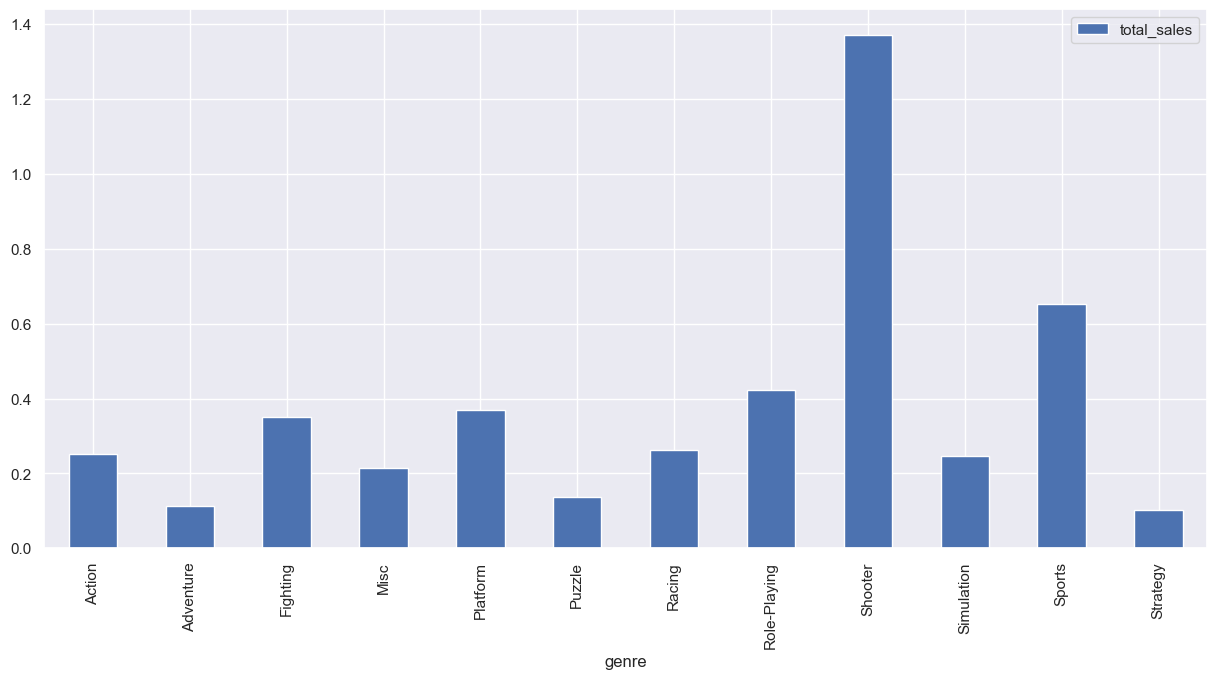

In [83]:
# based on 2011-2016 data
actual_platform_data.pivot_table(index='genre', values=['total_sales']).plot(kind='bar');

The most popular genre in terms of copies sold is Shooter.

Let's identify **the most popular genres** by number of copies sold **by region.**

In [84]:
# Define a function to calculate sales shares by region and return the top 5 results
def get_top_sales_by_region(data, region_column, region_name, sales_column, top_n=5):
    # Calculate top platforms/genres by sales in the specified region
    top_sales = data.pivot_table(index=region_column, values=sales_column).sort_values(sales_column, ascending=False).head(top_n)
    
    # Calculate the total sales for the specified region
    region_sales_total = data.pivot_table(index=region_column, values=sales_column).sum()
    
    # Calculate the sales shares for the top platforms/genres
    region_sales_total_rate = (top_sales / region_sales_total) * 100
    
    # Merge the top sales data with the sales shares
    sales_data = top_sales.merge(region_sales_total_rate, left_index=True, right_index=True)
    
    # Rename the columns for clarity
    sales_data.columns = ['Number of Games Sold (Millions of Copies)', f'{region_name}_Sales_Share']
    
    return sales_data

# Get the top 5 genres for North America
sales_genres_na = get_top_sales_by_region(actual_platform_data, 'genre', 'NA', 'na_sales')

# Display the results
print("\nTop 5 genres for North America based on 2011-2016 data, shares of sales:")
print(sales_genres_na)

# Get the top 5 genres for Europe
sales_genres_eu = get_top_sales_by_region(actual_platform_data, 'genre', 'EU', 'eu_sales')

# Display the results
print("\nTop 5 genres for Europe based on 2011-2016 data, shares of sales:")
print(sales_genres_eu)

# Get the top 5 genres for Japan
sales_genres_jp = get_top_sales_by_region(actual_platform_data, 'genre', 'JP', 'jp_sales')

# Display the results
print("\nTop 5 genres for Japan based on 2011-2016 data, shares of sales:")
print(sales_genres_jp)


Top 5 genres for North America based on 2011-2016 data, shares of sales:
              Number of Games Sold (Millions of Copies)  NA_Sales_Share
genre                                                                  
Shooter                                        0.624286       36.628070
Sports                                         0.267449       15.691757
Fighting                                       0.157714        9.253407
Role-Playing                                   0.150152        8.809684
Platform                                       0.150000        8.800795

Top 5 genres for Europe based on 2011-2016 data, shares of sales:
              Number of Games Sold (Millions of Copies)  EU_Sales_Share
genre                                                                  
Shooter                                        0.522078       30.591177
Sports                                         0.281429       16.490319
Racing                                         0.158537        9.28

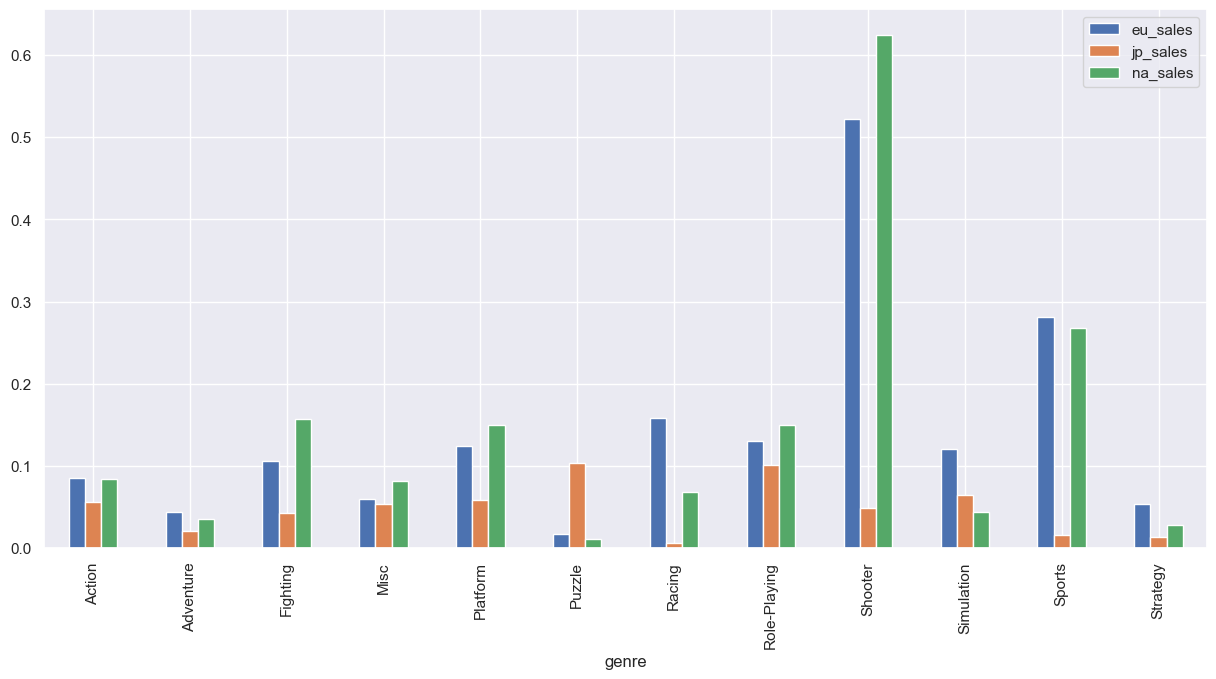

In [85]:
actual_platform_data.pivot_table(index='genre', \
                                 values=['na_sales', 'eu_sales', 'jp_sales']).plot(kind='bar');

The leading genres by number of games sold for the period 2011-2016 in North America with their respective shares of total sales in the region are Shooter - 36%, Sports - 16%, Fighting - 9%, Role-Playing- 8%, Platform - 9%.

In Europe, the following genres were the most popular during this period with the corresponding shares of total sales in the region: Shooter - 30%, Sports - 16%, Racing - 9%, Role-Playing - 8%, , Platform - 7%.

The top 5 genres in Japan by number of games sold in the same period with their respective shares of total sales in the region are Puzzle - 18%, Role-Playing - 17%, Simulation - 11%, Platform - 10%, , Action - 10%.

Let's find out **whether the ESRB rating affects sales** in a particular region.

In [86]:
# Define a function to calculate sales shares by ESRB rating and return the results
def get_sales_by_esrb(data, region_column, region_name, sales_column):
    # Calculate sales by ESRB rating
    sales_esrb = data.pivot_table(index='rating', values=sales_column).sort_values(sales_column, ascending=False)
    
    # Calculate the sum of games sold by region
    region_sales_total = data.pivot_table(index='rating', values=sales_column).sort_values(sales_column, ascending=False).sum()
    
    # Calculate the sales shares for ESRB ratings
    region_sales_total_rate = (sales_esrb / region_sales_total) * 100
    
    # Merge the sales data with the sales shares
    sales_esrb = sales_esrb.merge(region_sales_total_rate, on='rating')
    
    # Rename the columns for clarity
    sales_esrb.columns = ['Number of Games Sold (Millions of Copies)', f'{region_name}_Sales_Share']
    
    return sales_esrb

# Get the sales by ESRB rating for North America
sales_esrb_na = get_sales_by_esrb(actual_platform_data, 'rating', 'NA', 'na_sales')

# Display the results
print("Sales by ESRB rating for North America based on 2011-2016 data, shares of sales:")
print(sales_esrb_na)

# Get the sales by ESRB rating for Europe
sales_esrb_eu = get_sales_by_esrb(actual_platform_data, 'rating', 'EU', 'eu_sales')

# Display the results
print("\nSales by ESRB rating for Europe based on 2011-2016 data, shares of sales:")
print(sales_esrb_eu)

# Get the sales by ESRB rating for Japan
sales_esrb_jp = get_sales_by_esrb(actual_platform_data, 'rating', 'JP', 'jp_sales')

# Display the results
print("\nSales by ESRB rating for Japan based on 2011-2016 data, shares of sales:")
print(sales_esrb_jp)


Sales by ESRB rating for North America based on 2011-2016 data, shares of sales:
         Number of Games Sold (Millions of Copies)  NA_Sales_Share
rating                                                            
M                                         0.323931       34.519323
E10+                                      0.213038       22.702137
E                                         0.198864       21.191665
T                                         0.127472       13.583891
Unknown                                   0.075100        8.002984

Sales by ESRB rating for Europe based on 2011-2016 data, shares of sales:
         Number of Games Sold (Millions of Copies)  EU_Sales_Share
rating                                                            
M                                         0.313931       35.345547
E                                         0.260530       29.333150
E10+                                      0.129241       14.551210
T                                       

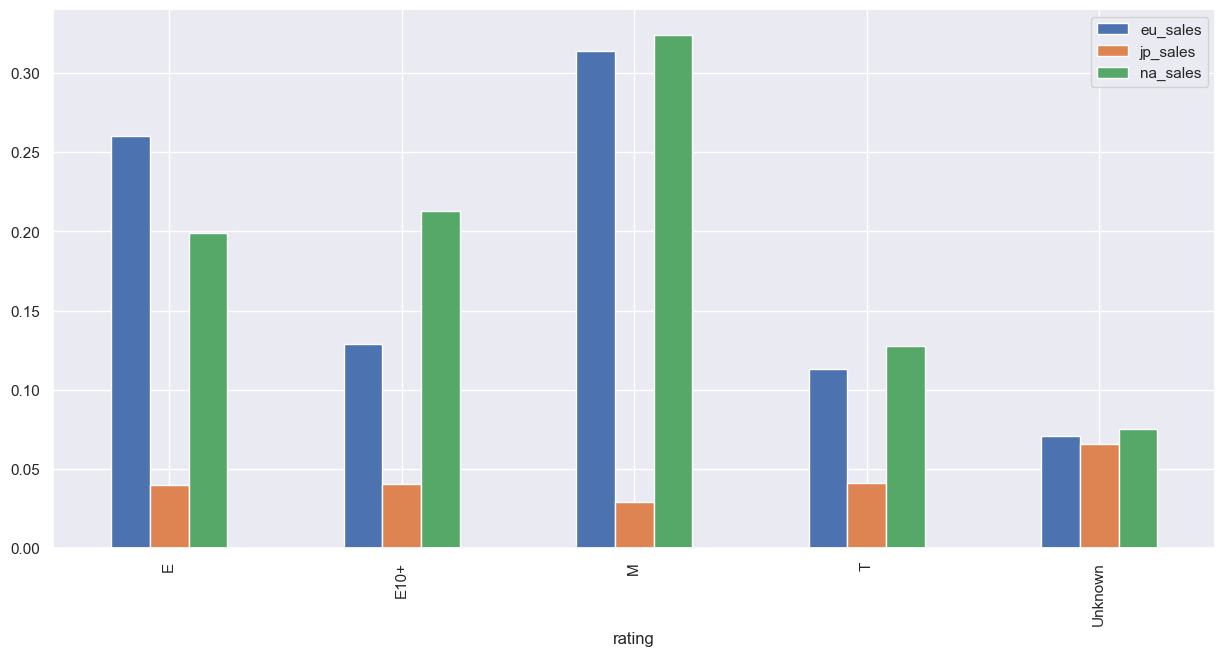

In [87]:
actual_platform_data.pivot_table(index='rating', \
                                 values=['na_sales', 'eu_sales', 'jp_sales']).plot(kind='bar');


In North America, the top-selling games according to ESRB rankings from 2011-2016 were M, E10+, E and T. 17+ content accounts for 35%, children's content and games that are suitable for everyone account for 59%. The remaining category is unknown.

In Europe, the best-selling games according to ESRB rankings for the period 2011-2016 were the same: M, E10+, E and T. Content 17+ accounts for 35%, followed by E (suitable for everyone) at 30%, children's content and games for teens 13+ make up 28%. The rest is category unknown.

In Japan, the best-selling games according to the ESRB ranking for the period 2011-2016 were also: T, E10+, E and M. However, it is worth noting that the category for 30% of games is unknown. The share of games in category T ("Teen" - Teens 13+) is 19%. The M cathegory accounts for 14%. The rest is for E and E10+.

**SUMMARY**

At this stage, we have identified the top 5 most popular platforms and genres in each region (NA, EU, JP). We also found out the share of ESRB rating categories in sales by region.
- The maximum number of copies sold on all platforms except 3DS, PS4 and PSV is observed in North America. Minimum - in Japan (except 3DS and PSV). In addition, there were no sales on PC, X360 and XOne in Japan during the period covered. PS4 is the most popular platform in Europe.

- Top 5 platforms by number of games sold 2011-2016 in North America with respective shares of total sales in the region: XOne - 28%, WiiU - 20%, PS4 - 19%, X360 - 17%, 3DS - 7% .

- Top 5 platforms by number of games sold for the period 2011-2016 in Europe with respective shares of total sales in the region: PS4 - 30%, XOne - 19%, WiiU - 18%, X360 - 10%, PC - 9%.

- Top 5 platforms by number of games sold for the period 2011-2016 in Japan with respective shares of total sales in the region: 3DS - 44%, WiiU - 25%, PS3 - 11%, PSV - 10%, PS4 - 9%.

- The most popular genre in terms of the number of copies sold is Shooter.

- Leaders among genres in terms of the number of games sold for the period 2011-2016 in North America with the corresponding shares of total sales in the region: Shooter - 36%, Sports - 16%, Fighting - 9%, Role-Playing - 8%, Platform - 9 %.

- In Europe, the following genres were more popular during the specified period with the corresponding shares of total sales in the region: Shooter - 30%, Sports - 16%, Racing - 9%, Role-Playing - 8%, , Platform - 7%.

- Top 5 genres in Japan by number of games sold in the same period with respective shares of total sales in the region: Puzzle - 18%, Role-Playing - 17%, Simulation - 11%, Platform - 10%, , Action - 10 %.

- In North America, the best-selling games by the ESRB for the period 2011-2016 were: M, E10+, E and T. 17+ content accounted for 35%, children's content and games that are suitable for everyone account for 59%. The rest of the category is unknown.

- In Europe, the best-selling games according to the ESRB rating for the period 2011-2016 were the same: M, E10+, E and T. 17+ content accounts for 35%, followed by E (suitable for everyone) - 30%, children's content and games for teenagers 13+ make up 28%. The rest - the category is unknown.

- In Japan, the best-selling games according to the ESRB rating for the period 2011-2016 were also: T, E10+, E and M. However, it is worth noting that the category for 30% of games is unknown. The share of games in the category T ("Teen") - "Teens" 13+) is 19%. Category M accounts for 14%. The rest is on E and E10 +.

### Hypothesis testing

Let's formulate the null and alternative hypotheses about the equality of average user ratings of Xbox One and PC platforms:

- H0: Average user ratings of Xbox One and PC platforms are equal

- H1: Average user ratings of Xbox One and PC platforms are not equal

Let's calculate the statistics. These are two independent general populations, so we will take a t-test with a critical level of statistical significance of 0.05, and equal_var = False - because the gene pools are unequal in the number of elements.

In [88]:
# User ratings for the 'XOne' platform
xone_ur_score = actual_platform_data.loc[(actual_platform_data['platform']=='XOne') & \
                         (actual_platform_data['user_score'].notna())]['user_score'].astype('float64')
xone_ur_score = xone_ur_score.tolist()

# User ratings for the 'PC' platform
pc_ur_score = actual_platform_data.loc[(actual_platform_data['platform']=='PC') & \
                       (actual_platform_data['user_score'].notna())]['user_score'].astype('float64')
pc_ur_score = pc_ur_score.tolist()

In [89]:
# Define the critical level of statistical significance
alpha = 0.05

# Test the hypothesis about the equality of means for two independent samples
results = st.ttest_ind(xone_ur_score, pc_ur_score, equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Compare the obtained p-value with the specified level of statistical significance
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value: 0.2946308864003345
Fail to reject the null hypothesis


Let's formulate the null and alternative hypotheses about the inequality of average user ratings of Action and Sports genres:

- H0: The average user ratings of Action and Sports genres are equal

- H1: Average user ratings of Action and Sports genres are not equal

Let's calculate the statistics. These are two independent general populations, so we will take a t-test with a critical level of statistical significance of 0.05, and equal_var = False - because the gene pools are unequal in the number of elements.

In [90]:
# User ratings for the 'Action' genre
action_ur_score = actual_platform_data.loc[(actual_platform_data['genre'] == 'Action') & \
                           (actual_platform_data['user_score'].notna())]['user_score'].tolist()

# User ratings for the 'Sports' genre
sports_ur_score = actual_platform_data.loc[(actual_platform_data['genre'] == 'Sports') & \
                           (actual_platform_data['user_score'].notna())]['user_score'].tolist()

In [91]:
# Define the critical level of statistical significance
alpha = 0.05

# Test the hypothesis about the equality of means for two independent samples
results = st.ttest_ind(action_ur_score, sports_ur_score, equal_var=False)

# Print the p-value
print('p-value:', results.pvalue)

# Compare the obtained p-value with the specified level of statistical significance
if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value: 5.97163549920592e-10
Reject the null hypothesis


**SUMMARY**

In this step, we formulated null and alternative hypotheses about:

- The equality of the average user ratings of the Xbox One and PC platforms

    - H0: The average user ratings of Xbox One and PC platforms are equal
    - H1: Average user ratings of Xbox One and PC platforms are not equal
- inequality of average user ratings of Action and Sports genres

    - H0: The average user ratings of Action and Sports genres are equal
    - H1: Average user ratings of Action and Sports genres are not equal
    
We performed a t-test with a significance level of 0.05. Based on the test results, both null hypotheses were rejected.

## CONCLUSION

A study was made of historical data on game sales up to 2016, user and expert ratings, genres and platforms in order to identify patterns that determine the success of a game, which would allow us to bet on a potentially popular product and plan advertising campaigns.

The study was carried out in several stages:

1) DATA PREPARATION

  - At this point, we have changed data types: 'year_of_release' to 'datetime' , 'critic_score' to 'Int32', 'user_score' to 'Float64'. Handled missing values in columns: 'name', 'genre', 'critic_score', 'user_score', 'rating'.
  - Excluded rows with missing values in 'name' and 'genre' columns. They found no reason to consider the missing values of the columns 'critic_score', 'user_score', 'rating' as systematic errors and decided to leave the data in these columns unchanged, with one exception - they replaced the values of 'tbd' ('To Be Decided') with ' None', in order not to encounter errors in further calculations. Filling in with an average or median value was considered impractical, since the values in these columns do not depend on genre, game title, year of release, or number of copies sold. The exclusion of such a large amount of data could have skewed the results of the study, so the data were left unchanged. A possible solution would be to enrich data from external sources, but due to time constraints, this option was not implemented.
  - In addition, a check was performed for the presence of explicit and implicit duplicates, according to the results of which none were identified.
  - We also cleaned the values from outliers and anomalies in the columns with data on game sales by region. After we displayed the rows with the maximum values for the specified columns, it became clear that our assumption that the maximum values in these columns could be the sum of the values was incorrect. Because these values were too different from the rest, they were excluded from the set after we built the charts and performed the mustache box test. The data according to the estimates of critics and users did not need to be cleaned from anomalies and outliers.
  - Total sales were calculated in all regions, the results were recorded in the 'total_sales' column

2) RESEARCH ANALYSIS

- At this stage, it was found that according to available data, most games were released in 2008. Least of all - in 1980. From 2000 to 2008, there is an increase in the number of copies sold, and then a decline until 2016.

- Top 10 platforms with the highest total sales: PS2, X360, PS3, Wii, PS, DS, PS4, PSP, GBA, PC4

- There is no significant correlation between critic ratings and global sales, as well as between user ratings and global sales.

- Fighting, Sports and Shooter genres are leading in terms of the number of games sold. Adventure, Puzzle and Strategy have the lowest sales.

3) PROFILE OF A USER IN EACH REGION

- At this stage, we have identified the top 5 most popular platforms and genres in each region (NA, EU, JP). We also found out the share of ESRB rating categories in sales by region.

- The maximum number of copies sold on all platforms except 3DS, PS4 and PSV is observed in North America. Minimum - in Japan (except 3DS and PSV). In addition, there were no sales on PC, X360 and XOne in Japan during the period covered. PS4 is the most popular platform in Europe.

- Top 5 platforms by number of games sold 2011-2016 in North America with respective shares of total sales in the region: XOne - 28%, WiiU - 20%, PS4 - 19%, X360 - 17%, 3DS - 7% .

- Top 5 platforms by number of games sold for the period 2011-2016 in Europe with respective shares of total sales in the region: PS4 - 30%, XOne - 19%, WiiU - 18%, X360 - 10%, PC - 9%.

- Top 5 platforms by number of games sold for the period 2011-2016 in Japan with respective shares of total sales in the region: 3DS - 44%, WiiU - 25%, PS3 - 11%, PSV - 10%, PS4 - 9%.

- The most popular genre in terms of the number of copies sold is Shooter.

- Leaders among genres in terms of the number of games sold for the period 2011-2016 in North America with the corresponding shares of total sales in the region: Shooter - 36%, Sports - 16%, Fighting - 9%, Role-Playing - 8%, Platform - 9 %.

- In Europe, the following genres were more popular during the specified period with the corresponding shares of total sales in the region: Shooter - 30%, Sports - 16%, Racing - 9%, Role-Playing - 8%, , Platform - 7%.

- Top 5 genres in Japan by number of games sold in the same period with respective shares of total sales in the region: Puzzle - 18%, Role-Playing - 17%, Simulation - 11%, Platform - 10%, , Action - 10 %.

- In North America, the best-selling games by the ESRB for the period 2011-2016 were: M, E10+, E and T. 17+ content accounted for 35%, children's content and games that are suitable for everyone account for 59%. The rest of the category is unknown.

- In Europe, the best-selling games according to the ESRB rating for the period 2011-2016 were the same: M, E10 +, E and T. 17+ content accounts for 35%, followed by E (suitable for everyone) - 30%, children's content and games for adolescents 13+ make up 28%. The rest - the category is unknown.

- In Japan, the best-selling games according to the ESRB rating for the period 2011-2016 were also: T, E10+, E and M. However, it is worth noting that the category for 30% of games is unknown. The share of games in the category T ("Teen") - "Teens" 13+) is 19%. Category M accounts for 14%. The rest on E and E10+

4) HYPOTHESIS TESTING

At this stage, we formulated null and alternative hypotheses about:
- equality of average user ratings of Xbox One and PC platforms
   - H0: The average user ratings of the Xbox One and PC platforms are equal
   - H1: The average user ratings of the Xbox One and PC platforms are not equal

- disparity in the average user ratings of Action and Sports genres
   - H0: Average user ratings for Action and Sports are equal
   - H1: Average user ratings for Action and Sports genres are not equal

We performed a t-test with a significance level of 0.05. Based on the results of the test, both null hypotheses were rejected.

**According to the results of the study, we may conclude that**

- it should be kept in mind that the leaders of sales among the genres are Fighting, Sports and Shooter, and the lowest sales are Adventure, Puzzle and Strategy;

- when focusing on the North American and European markets, it should be taken into account that the best-selling games according to the ESRB rating are games of the M (17+) category, and the genres are Sports, Shooter, Fighting, Racing. While in Japan the most popular games are for teenagers (13+) and the genres of Puzzles and Role-Playing;

- The platform with the highest global sales is PS4 and Xbox One.